# Analysis of the incidence of chickenpox

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [3]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202221          7  24276    18942   29610      37          29   
1     202220          7  23774    19136   28412      36          29   
2     202219          7  18613    14198   23028      28          21   
3     202218          7  17851    13963   21739      27          21   
4     202217          7  20314    16001   24627      31          24   
5     202216          7  19660    14860   24460      30          23   
6     202215          7  17799    13715   21883      27          21   
7     202214          7  17005    13162   20848      26          20   
8     202213          7  15448    11659   19237      23          17   
9     202212          7  14702    10794   18610      22          16   
10    202211          7  11729     8347   15111      18          13   
11    202210          7  13314    10036   16592      20          15   
12    202209          7  10485     7600   13370      16          12   
13    202208          7  12088     8741   15435      18          13   
14    202207          7  14003    10789   17217      21          16   
15    202206          7   9798     7048   12548      15          11   
16    202205          7  10851     7797   13905      16          11   
17    202204          7   9547     6721   12373      14          10   
18    202203          7  13972    10680   17264      21          16   
19    202202          7   8495     6026   10964      13           9   
20    202201          7  13793    10597   16989      21          16   
21    202152          7  13239     9611   16867      20          15   
22    202151          7  13326     9629   17023      20          14   
23    202150          7  14128    10312   17944      21          15   
24    202149          7  13674    10369   16979      21          16   
25    202148          7  11549     8503   14595      17          12   
26    202147          7  11419     8376   14462      17          12   
27    202146          7   8216     5724   10708      12           8   
28    202145          7   8965     6468   11462      14          10   
29    202144          7   8736     5636   11836      13           8   
...      ...        ...    ...      ...     ...     ...         ...   
1613  199126          7  17608    11304   23912      31          20   
1614  199125          7  16169    10700   21638      28          18   
1615  199124          7  16171    10071   22271      28          17   
1616  199123          7  11947     7671   16223      21          13   
1617  199122          7  15452     9953   20951      27          17   
1618  199121          7  14903     8975   20831      26          16   
1619  199120          7  19053    12742   25364      34          23   
1620  199119          7  16739    11246   22232      29          19   
1621  199118          7  21385    13882   28888      38          25   
1622  199117          7  13462     8877   18047      24          16   
1623  199116          7  14857    10068   19646      26          18   
1624  199115          7  13975     9781   18169      25          18   
1625  199114          7  12265     7684   16846      22          14   
1626  199113          7   9567     6041   13093      17          11   
1627  199112          7  10864     7331   14397      19          13   
1628  199111          7  15574    11184   19964      27          19   
1629  199110          7  16643    11372   21914      29          20   
1630  199109          7  13741     8780   18702      24          15   
1631  199108          7  13289     8813   17765      23          15   
1632  199107          7  12337     8077   16597      22          15   
1633  199106          7  10877     7013   14741      19          12   
1634  199105          7  10442     6544   14340      18          11   
1635  199104          7   7913     4563   11263      14           8   
1636  199103          7  15387    10484   20290      27          18   
1637  199102          7  16277  

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [5]:
data = raw_data.copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202221          7  24276    18942   29610      37          29   
1     202220          7  23774    19136   28412      36          29   
2     202219          7  18613    14198   23028      28          21   
3     202218          7  17851    13963   21739      27          21   
4     202217          7  20314    16001   24627      31          24   
5     202216          7  19660    14860   24460      30          23   
6     202215          7  17799    13715   21883      27          21   
7     202214          7  17005    13162   20848      26          20   
8     202213          7  15448    11659   19237      23          17   
9     202212          7  14702    10794   18610      22          16   
10    202211          7  11729     8347   15111      18          13   
11    202210          7  13314    10036   16592      20          15   
12    202209          7  10485     7600   13370      16          12   
13    202208          7  12088     8741   15435      18          13   
14    202207          7  14003    10789   17217      21          16   
15    202206          7   9798     7048   12548      15          11   
16    202205          7  10851     7797   13905      16          11   
17    202204          7   9547     6721   12373      14          10   
18    202203          7  13972    10680   17264      21          16   
19    202202          7   8495     6026   10964      13           9   
20    202201          7  13793    10597   16989      21          16   
21    202152          7  13239     9611   16867      20          15   
22    202151          7  13326     9629   17023      20          14   
23    202150          7  14128    10312   17944      21          15   
24    202149          7  13674    10369   16979      21          16   
25    202148          7  11549     8503   14595      17          12   
26    202147          7  11419     8376   14462      17          12   
27    202146          7   8216     5724   10708      12           8   
28    202145          7   8965     6468   11462      14          10   
29    202144          7   8736     5636   11836      13           8   
...      ...        ...    ...      ...     ...     ...         ...   
1613  199126          7  17608    11304   23912      31          20   
1614  199125          7  16169    10700   21638      28          18   
1615  199124          7  16171    10071   22271      28          17   
1616  199123          7  11947     7671   16223      21          13   
1617  199122          7  15452     9953   20951      27          17   
1618  199121          7  14903     8975   20831      26          16   
1619  199120          7  19053    12742   25364      34          23   
1620  199119          7  16739    11246   22232      29          19   
1621  199118          7  21385    13882   28888      38          25   
1622  199117          7  13462     8877   18047      24          16   
1623  199116          7  14857    10068   19646      26          18   
1624  199115          7  13975     9781   18169      25          18   
1625  199114          7  12265     7684   16846      22          14   
1626  199113          7   9567     6041   13093      17          11   
1627  199112          7  10864     7331   14397      19          13   
1628  199111          7  15574    11184   19964      27          19   
1629  199110          7  16643    11372   21914      29          20   
1630  199109          7  13741     8780   18702      24          15   
1631  199108          7  13289     8813   17765      23          15   
1632  199107          7  12337     8077   16597      22          15   
1633  199106          7  10877     7013   14741      19          12   
1634  199105          7  10442     6544   14340      18          11   
1635  199104          7   7913     4563   11263      14           8   
1636  199103          7  15387    10484   20290      27          18   
1637  199102          7  16277  

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [7]:
 sorted_data = data.set_index('period').sort_index()

In [8]:
 periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

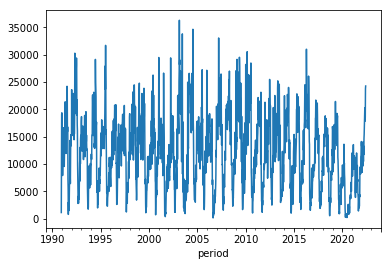

In [9]:
sorted_data['inc'].plot()

In [10]:
first_january_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1990,
                                    sorted_data.index[-1].year)]

In [11]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_january_week[:-1],
                        first_january_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

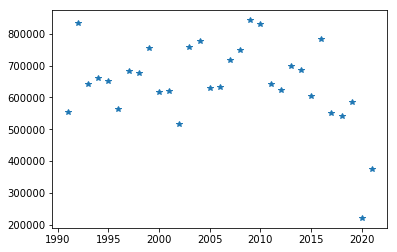

In [12]:
 yearly_incidence.plot(style='*')

In [13]:
 yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1991    553090
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64